## Projecting data: `PCA` vs. `KernelPCA`

In [1]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples = 1000, factor = 0.3, noise = 0.05, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)

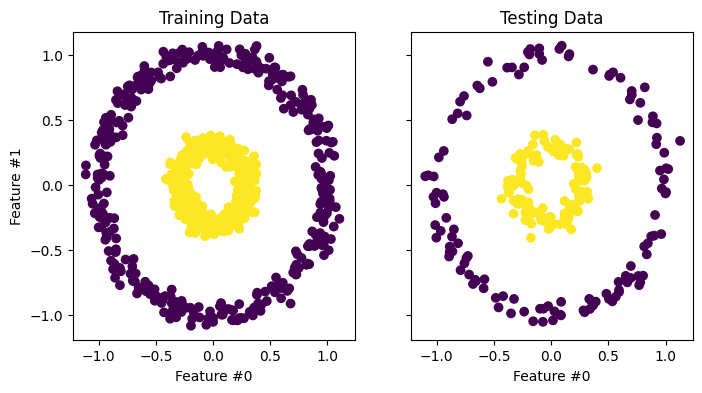

In [2]:
import matplotlib.pyplot as plt

_, (train_ax, test_ax) = plt.subplots(ncols = 2, sharex = True, sharey = True, figsize = (8, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training Data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing Data")

In [3]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components = 2)
kernel_pca = KernelPCA(n_components = None, 
                       kernel = "rbf",
                       gamma = 10, 
                       fit_inverse_transform = True,
                       alpha = 0.1)

In [4]:
X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)
print(X_test_pca.shape)
print(X_test_kernel_pca.shape)

(250, 2)
(250, 368)


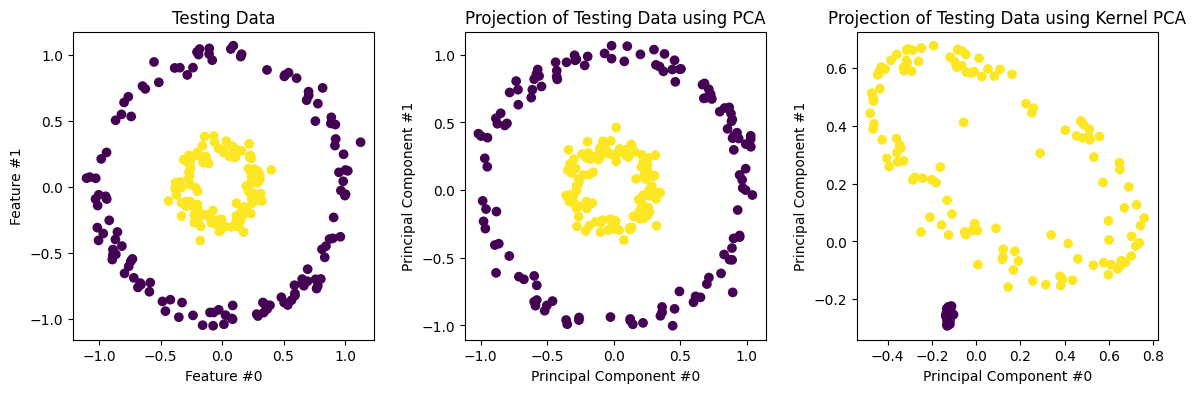

In [5]:
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(ncols = 3, figsize = (14, 4))

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing Data")

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c = y_test)
pca_proj_ax.set_ylabel("Principal Component #1")
pca_proj_ax.set_xlabel("Principal Component #0")
pca_proj_ax.set_title("Projection of Testing Data using PCA")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c = y_test)
kernel_pca_proj_ax.set_ylabel("Principal Component #1")
kernel_pca_proj_ax.set_xlabel("Principal Component #0")
_ = kernel_pca_proj_ax.set_title("Projection of Testing Data using Kernel PCA")

plt.subplots_adjust(wspace = 0.3)

### Projecting into the Original Feature Space

In [6]:
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kernel_pca = kernel_pca.inverse_transform(kernel_pca.transform(X_test))

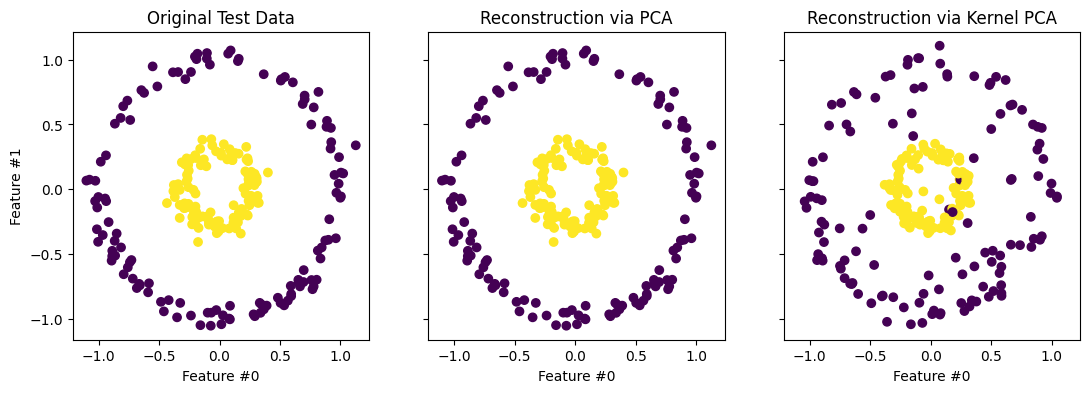

In [7]:
fig, (orig_data_ax, pca_back_proj_ax, kernel_pca_back_proj_ax) = plt.subplots(ncols = 3, sharex = True, sharey = True, figsize = (13, 4))

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Original Test Data")

pca_back_proj_ax.scatter(X_reconstructed_pca[:, 0], X_reconstructed_pca[:, 1], c = y_test)
pca_back_proj_ax.set_xlabel("Feature #0")
pca_back_proj_ax.set_title("Reconstruction via PCA")

kernel_pca_back_proj_ax.scatter(X_reconstructed_kernel_pca[:, 0], X_reconstructed_kernel_pca[:, 1], c = y_test)
kernel_pca_back_proj_ax.set_xlabel("Feature #0")
_ = kernel_pca_back_proj_ax.set_title("Reconstruction via Kernel PCA")